<a href="https://colab.research.google.com/github/cstirneman1/MLA_CMS/blob/main/MLA5_CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for specific models


In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Acquire Data


In [12]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/landsat_test.csv')

#Statistics and Visual Exploration


In [28]:
landsat_train_landtype = landsat_train['land_type'].value_counts().reset_index()
landsat_test_landtype = landsat_test['land_type'].value_counts().reset_index()

landsat_train_landtype.columns = ['land_type', 'Count']
landsat_test_landtype.columns = ['land_type', 'Count']

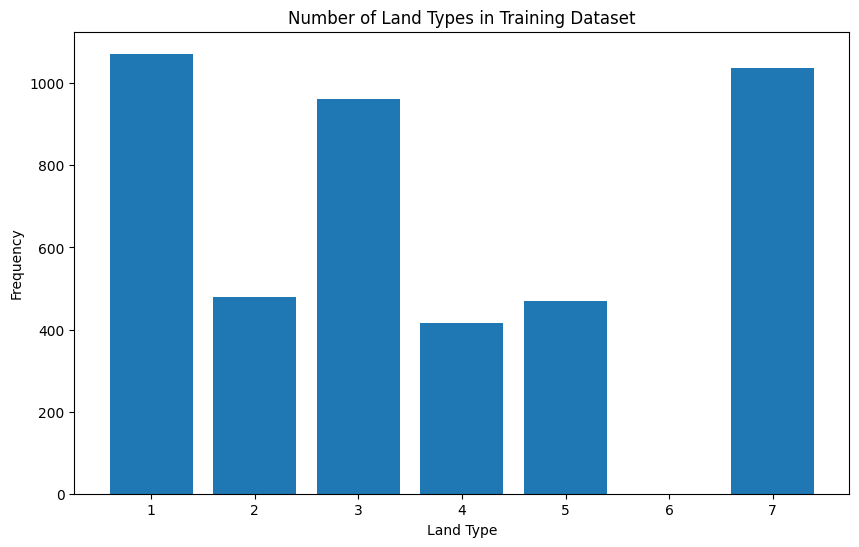

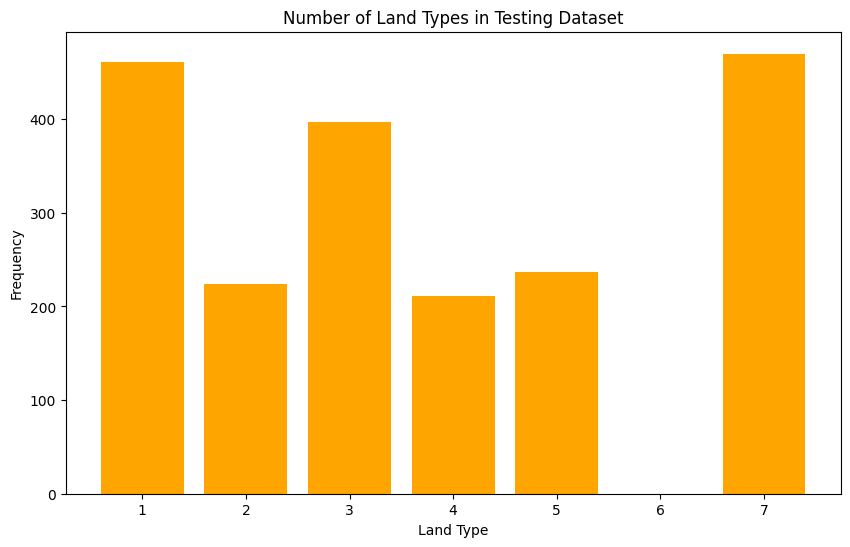

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(landsat_train_landtype['land_type'], landsat_train_landtype['Count'])
plt.title('Number of Land Types in Training Dataset')
plt.xlabel('Land Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(landsat_test_landtype['land_type'], landsat_test_landtype['Count'], color='orange')
plt.title('Number of Land Types in Testing Dataset')
plt.xlabel('Land Type')
plt.ylabel('Frequency')
plt.show()

#Splitting Data into Train/Test

In [30]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)

y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

#Building the Pipeline


In [31]:
numerical_features = X_train.columns

column_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)
], remainder='passthrough')

In [35]:
random_forest = Pipeline(steps=[
    ('transformer', column_transformer),
    ('classifier', RandomForestClassifier())
])

#Executing the Model


In [36]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'mid...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

#Evaluating the Model


In [37]:
y_test_raveled = np.ravel(y_test)
y_pred = random_forest.predict(X_test)

In [38]:
report = classification_report(np.ravel(y_test), y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.98      0.98       224
           3       0.89      0.94      0.91       397
           4       0.78      0.63      0.70       211
           5       0.92      0.90      0.91       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



In [39]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

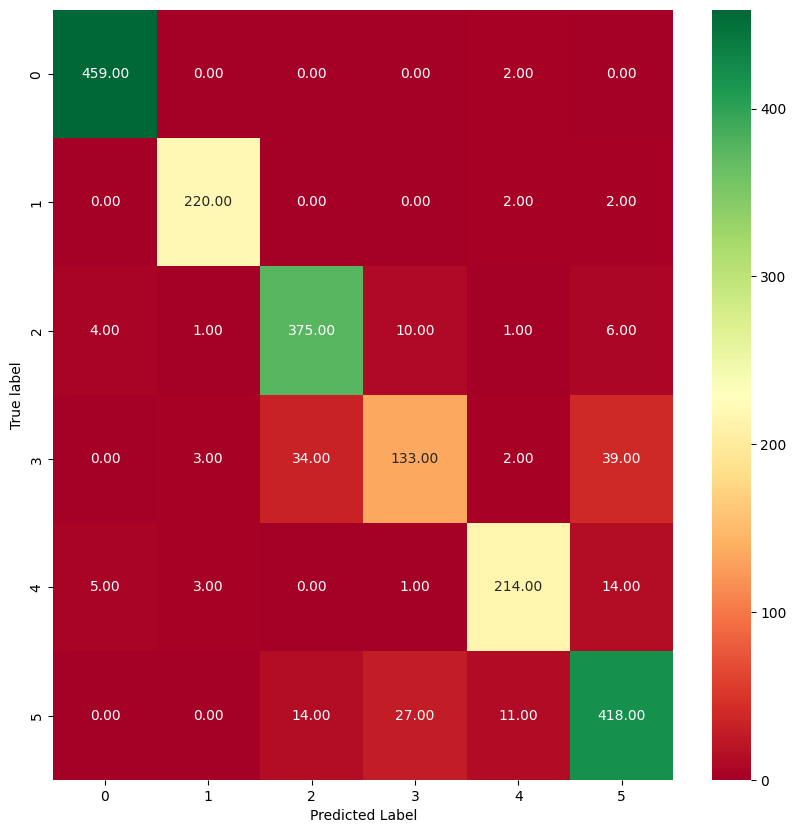

In [40]:
plot_cm(y_test_raveled, y_pred)


#Conclusion

The RandomForestClassifier model performs very well in predicting the land type, with high scores in precision, recall, and F1 across most classes. The overall accuracy of 91% is commendable and indicates the model's strong predictive capabilities.

However, the performance varies significantly across different classes. Class 4, in particular, stands out as being more challenging for the model, with notably lower precision, recall, and F1 scores. This suggests that there may be characteristics of class 4 that are not as well captured by the model as they are for other classes.

Given these results, the RandomForestClassifier model is suitable for predicting land types, especially if the primary concern includes classes 1, 2, 3, 5, and 7.

#Problem 2

#Splitting Data into Train/Test

In [42]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)

y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

#Building the Pipeline


In [43]:
numerical_features = X_train.columns


In [44]:
column_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)
], remainder='passthrough')


In [50]:
pipeline = Pipeline(steps=[
    ('transformer', column_transformer),
    ('bagging_classifier', BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=1000, n_estimators=1000,
                                   n_jobs=-1))
])

#Executing the Model

In [51]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'mid...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bagging_classifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=1000, n_estimators=1000,
                                   n_jobs=-1))])

#Evaluating the Model

In [52]:
y_pred = pipeline.predict(X_test)


In [53]:
report = classification_report(np.ravel(y_test), y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       461
           2       0.99      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.72      0.60      0.65       211
           5       0.89      0.81      0.85       237
           7       0.85      0.87      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.89      0.88      2000



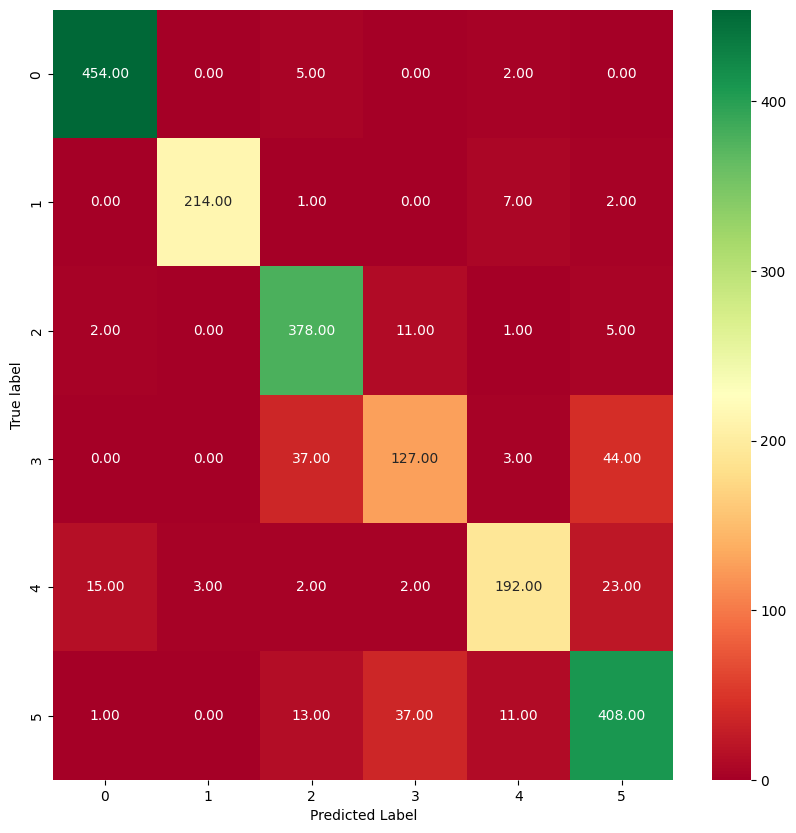

In [54]:
plot_cm(y_test_raveled, y_pred)

#Conclusion

The Bagging Classifier model demonstrates strong suitability for predicting land type, with robust overall accuracy and balanced performance metrics across most classes. However, the model's performance varies significantly among the different land types, with class 4 notably underperforming compared to others. This suggests that while the model is generally reliable. Given these observations, the model can be considered suitable for practical applications, especially if the primary interest involves the land types corresponding to classes 1, 2, 3, 5, and 7.

#Problem 3

#Acquire Data


In [56]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#Splitting Data into Train/Test

In [61]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Building the Pipeline


In [66]:
col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.columns)
    ])

random_forest = Pipeline(steps=[
    ('transformer', col_transform),
    ('classifier', RandomForestClassifier(max_samples=1000, n_estimators=100, n_jobs=-1))
])


#Executing the Model


In [68]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_samples=1000, n_jobs=-1))])

#Evaluating the Model


In [69]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



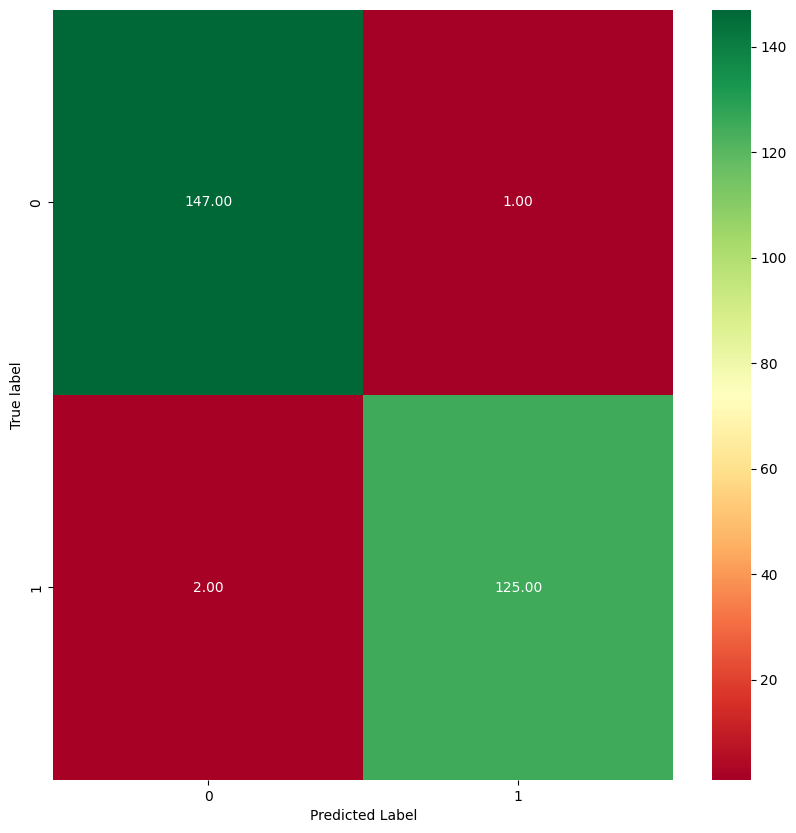

In [70]:
plot_cm(y_test, y_pred)


#Conclusion